# **Phishing Website Detection by Machine Learning Techniques**

*Final project of AI & Cybersecurity Course*

## **2. Loading Data:**

The features are extracted and store in the csv file. The working of this can be seen in the 'Phishing Website Detection_Feature Extraction.ipynb' file.

The reulted csv file is uploaded to this notebook and stored in the dataframe.

In [52]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [53]:
#Loading the data
data0 = pd.read_csv('DataFiles/5.urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [54]:
#Checking the shape of the dataset
data0.shape

(10000, 18)

In [55]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [56]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [57]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [58]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [59]:

#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [60]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,8,0,0,1,0,1,1,1,1,0,0,1,0,1
1,0,0,1,2,0,0,0,1,0,1,1,1,0,0,1,0,1
2,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,1
3,0,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,1
4,0,0,1,4,0,0,0,0,0,0,0,1,0,0,1,0,0


## **6. Splitting the Data**

In [61]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [62]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

In [63]:
#importing packages
from sklearn.metrics import accuracy_score

In [64]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

**PSO ALGORTIHM**


In [85]:
import random
import math
import copy
import sys
import pandas as pd

class Particle:
    def __init__(self, fitness, dim, min_bounds, max_bounds, seed):
        self.rnd = random.Random(seed)
        self.position = [0.0 for _ in range(dim)]
        self.velocity = [0.0 for _ in range(dim)]
        self.best_part_pos = [0.0 for _ in range(dim)]
        
        for i in range(dim):
            self.position[i] = (max_bounds[i] - min_bounds[i]) * self.rnd.random() + min_bounds[i]
            self.velocity[i] = (max_bounds[i] - min_bounds[i]) * self.rnd.random() + min_bounds[i]
        
        self.fitness = fitness(self.position)
        self.best_part_pos = copy.copy(self.position)
        self.best_part_fitnessVal = self.fitness

def pso(fitness, max_iter, n, dim, min_bounds, max_bounds):
    w = 0.729
    c1 = 1.49445
    c2 = 1.49445
    rnd = random.Random(0)
    print("min_bounds:", min_bounds)  # Add this line to print min_bounds
    print("max_bounds:", max_bounds)
    
    swarm = [Particle(fitness, dim, min_bounds, max_bounds, i) for i in range(n)]
    
    best_swarm_pos = [0.0 for _ in range(dim)]
    best_swarm_fitnessVal = sys.float_info.max
    w_values = []
    for i in range(n):
        if swarm[i].fitness < best_swarm_fitnessVal:
            best_swarm_fitnessVal = swarm[i].fitness
            best_swarm_pos = copy.copy(swarm[i].position)
    
    Iter = 0
    results = []  # Store results for writing to Excel
    
    while Iter < max_iter:
        if Iter % 10 == 0 and Iter > 1:
            print("Iter = " + str(Iter) + " best fitness = %.3f" % best_swarm_fitnessVal)
            results.append((Iter, best_swarm_fitnessVal))
            w_values.append(w)
        for i in range(n):
            for k in range(dim):
                r1 = rnd.random()
                r2 = rnd.random()
                swarm[i].velocity[k] = (
                    (w *swarm[i].velocity[k]) +
                    (c1 * r1 * (swarm[i].best_part_pos[k] - swarm[i].position[k])) +
                    (c2 * r2 *(best_swarm_pos[k] - swarm[i].position[k]))
                )
                if swarm[i].velocity[k] < min_bounds[k]:
                    swarm[i].velocity[k] = min_bounds[k]
                elif swarm[i].velocity[k] > max_bounds[k]:
                    swarm[i].velocity[k] = max_bounds[k]
            for k in range(dim):
                swarm[i].position[k] += swarm[i].velocity[k]
            swarm[i].fitness = fitness(swarm[i].position)
            if swarm[i].fitness < swarm[i].best_part_fitnessVal:
                swarm[i].best_part_fitnessVal = swarm[i].fitness
                swarm[i].best_part_pos = copy.copy(swarm[i].position)
            if swarm[i].fitness < best_swarm_fitnessVal:
                best_swarm_fitnessVal = swarm[i].fitness
                best_swarm_pos = copy.copy(swarm[i].position)
        Iter += 1
    
    

    return best_swarm_pos





**PSO Using Exponential Map (only w_max)**

In [117]:
import random
import math
import copy
import sys
import pandas as pd

class Particle:
    def __init__(self, fitness, dim, min_bounds, max_bounds, seed):
        self.rnd = random.Random(seed)
        self.position = [(max_bounds[i] - min_bounds[i]) * self.rnd.random() + min_bounds[i] for i in range(dim)]
        self.velocity = [(max_bounds[i] - min_bounds[i]) * self.rnd.random() + min_bounds[i] for i in range(dim)]
        self.fitness = fitness(self.position)
        self.best_part_pos = copy.copy(self.position)
        self.best_part_fitnessVal = self.fitness

def exponential_fitness(a):
    # Standard exponential function: f(x) = e^(-x^2)
    r = 4
    return r * math.exp(-sum(x ** 2 for x in a))

def psoexpo1(fitness, max_iter, n, dim, min_bounds, max_bounds, w_max=1, alpha=0.01):
    # w is now dynamic and will be calculated per iteration
    c1 = 1.49445
    c2 = 1.49445
    rnd = random.Random(0)
    
    swarm = [Particle(fitness, dim, min_bounds, max_bounds, i) for i in range(n)]
    best_swarm_pos = [0.0 for _ in range(dim)]
    best_swarm_fitnessVal = sys.float_info.max
    w_values = []
    for i in range(n):
        if swarm[i].fitness < best_swarm_fitnessVal:
            best_swarm_fitnessVal = swarm[i].fitness
            best_swarm_pos = copy.copy(swarm[i].position)
    
    Iter = 0
    results = []  # Store results for writing to Excel
    
    while Iter < max_iter:
        w = w_max * math.exp(-alpha * Iter)
        w_values.append(w)
        if Iter % 10 == 0 and Iter > 1:
            print(f"Iter = {Iter} best fitness = {best_swarm_fitnessVal:.3f}")
            results.append((Iter, best_swarm_fitnessVal))
        
        for i in range(n):
            for k in range(dim):
                r1 = rnd.random()
                r2 = rnd.random()
                swarm[i].velocity[k] = (
                    (w * swarm[i].velocity[k]) +
                    (c1 * r1 * (swarm[i].best_part_pos[k] - swarm[i].position[k])) +
                    (c2 * r2 * (best_swarm_pos[k] - swarm[i].position[k]))
                )
                # Ensure the velocity stays within bounds
                swarm[i].velocity[k] = max(min_bounds[k], min(swarm[i].velocity[k], max_bounds[k]))
                
            swarm[i].position = [swarm[i].position[k] + swarm[i].velocity[k] for k in range(dim)]
            
            swarm[i].fitness = fitness(swarm[i].position)
            if swarm[i].fitness < swarm[i].best_part_fitnessVal:
                swarm[i].best_part_fitnessVal = swarm[i].fitness
                swarm[i].best_part_pos = copy.copy(swarm[i].position)
            if swarm[i].fitness < best_swarm_fitnessVal:
                best_swarm_fitnessVal = swarm[i].fitness
                best_swarm_pos = copy.copy(swarm[i].position)
        Iter += 1
    
    return best_swarm_pos, w_values

# Example usage (you need to define your own fitness function, dimension, bounds, etc.)
best_position, w_values = psoexpo1(exponential_fitness, 100, 30, 2, [-10, -10], [10, 10])
print("Best Position:", best_position)


Iter = 10 best fitness = 0.000
Iter = 20 best fitness = 0.000
Iter = 30 best fitness = 0.000
Iter = 40 best fitness = 0.000
Iter = 50 best fitness = 0.000
Iter = 60 best fitness = 0.000
Iter = 70 best fitness = 0.000
Iter = 80 best fitness = 0.000
Iter = 90 best fitness = 0.000
Best Position: [14.72096179474869, -27.243223555620062]


**PSO using exponential map(w_max and w_min)**

In [67]:
import random
import math
import copy
import sys
import pandas as pd

class Particle:
    def __init__(self, fitness, dim, min_bounds, max_bounds, seed):
        self.rnd = random.Random(seed)
        self.position = [(max_bounds[i] - min_bounds[i]) * self.rnd.random() + min_bounds[i] for i in range(dim)]
        self.velocity = [(max_bounds[i] - min_bounds[i]) * self.rnd.random() + min_bounds[i] for i in range(dim)]
        self.fitness = fitness(self.position)  # Calculate fitness
        self.best_part_pos = copy.copy(self.position)
        self.best_part_fitnessVal = self.fitness

def psoexpo2(fitness, max_iter, n, dim, min_bounds, max_bounds, w_max=0.9, w_min=0.4, alpha=0.01):
    rnd = random.Random(0)
    swarm = [Particle(fitness, dim, min_bounds, max_bounds, i) for i in range(n)]
    best_swarm_pos = [0.0 for _ in range(dim)]
    best_swarm_fitnessVal = sys.float_info.max
    w_values = []
    for i in range(n):
        if swarm[i].fitness < best_swarm_fitnessVal:
            best_swarm_fitnessVal = swarm[i].fitness
            best_swarm_pos = copy.copy(swarm[i].position)
    
    Iter = 0
    results = []  # For storing results to possibly write to an Excel file later
    
    while Iter < max_iter:
        # Adjust w dynamically between w_max and w_min
        w = w_min + (w_max - w_min) * math.exp(-alpha * Iter)
        w_values.append(w)
        
        if Iter % 10 == 0 and Iter > 1:
            print(f"Iter = {Iter} best fitness = {best_swarm_fitnessVal:.3f}")
            results.append((Iter, best_swarm_fitnessVal))
        
        for i in range(n):
            for k in range(dim):
                r1 = rnd.random()
                r2 = rnd.random()
                swarm[i].velocity[k] = (
                    w * swarm[i].velocity[k] +
                    (1.49445 * r1 * (swarm[i].best_part_pos[k] - swarm[i].position[k])) +
                    (1.49445 * r2 * (best_swarm_pos[k] - swarm[i].position[k]))
                )
                # Clamp velocity within bounds
                swarm[i].velocity[k] = max(min_bounds[k], min(swarm[i].velocity[k], max_bounds[k]))
                
            swarm[i].position = [swarm[i].position[k] + swarm[i].velocity[k] for k in range(dim)]
            swarm[i].fitness = fitness(swarm[i].position)
            if swarm[i].fitness < swarm[i].best_part_fitnessVal:
                swarm[i].best_part_fitnessVal = swarm[i].fitness
                swarm[i].best_part_pos = copy.copy(swarm[i].position)
            if swarm[i].fitness < best_swarm_fitnessVal:
                best_swarm_fitnessVal = swarm[i].fitness
                best_swarm_pos = copy.copy(swarm[i].position)
        Iter += 1
    
    # Optional: Save results to a DataFrame and then to Excel
    # df_results = pd.DataFrame(results, columns=['Iteration', 'Best Fitness'])
    # df_results.to_excel('PSO_Results.xlsx', index=False)
    
    return best_swarm_pos, w_values

# Example usage
# Define your own fitness function, dimension, bounds, etc.
# best_position = pso(your_fitness_function, 100, 30, 2, [-10, -10], [10, 10])
# print("Best Position:", best_position)


**PSO using Exponential Map( updating c1 and c2)**

In [68]:
class Particle:
    def __init__(self, fitness, dim, min_bounds, max_bounds, seed):
        self.rnd = random.Random(seed)
        self.position = [(max_bounds[i] - min_bounds[i]) * self.rnd.random() + min_bounds[i] for i in range(dim)]
        self.velocity = [(max_bounds[i] - min_bounds[i]) * self.rnd.random() + min_bounds[i] for i in range(dim)]
        self.fitness = fitness(self.position)  # Calculate fitness
        self.best_part_pos = copy.copy(self.position)
        self.best_part_fitnessVal = self.fitness

def psoexpo3(fitness, max_iter, n, dim, min_bounds, max_bounds, w_max=0.729, c1_initial=1.49445, c2_initial=1.49445, alpha_c=0.02):
    # Initialize random number generator
    rnd = random.Random(0)
    
    # Initialize swarm
    swarm = [Particle(fitness, dim, min_bounds, max_bounds, i) for i in range(n)]
    
    # Initialize best swarm position and fitness
    best_swarm_pos = [0.0 for _ in range(dim)]
    best_swarm_fitnessVal = sys.float_info.max
    
    # Initialize inertia weight
    w_values = []
    w = w_max
    
    # Initialize acceleration coefficients
    c1_values = []
    c2_values = []
    c1 = c1_initial
    c2 = c2_initial
    
    # Store results for plotting
    results = []
    
    # Main PSO loop
    for Iter in range(max_iter):
        # Update inertia weight (optional)
        w_values.append(w)
        
        # Update acceleration coefficients using exponential decay
        c1 = max(c1_initial * math.exp(-alpha_c * Iter), 0.1)  # Lower bound of 0.1 for c1
        c2 = max(c2_initial * math.exp(-alpha_c * Iter), 0.1)  # Lower bound of 0.1 for c2
        c1_values.append(c1)
        c2_values.append(c2)
        
        # Update global best position and fitness
        for i in range(n):
            if swarm[i].fitness < best_swarm_fitnessVal:
                best_swarm_fitnessVal = swarm[i].fitness
                best_swarm_pos = copy.copy(swarm[i].position)
        
        # Update each particle's position and velocity
        for i in range(n):
            for k in range(dim):
                r1 = rnd.random()
                r2 = rnd.random()
                swarm[i].velocity[k] = (
                    (w * swarm[i].velocity[k]) +
                    (c1 * r1 * (swarm[i].best_part_pos[k] - swarm[i].position[k])) +
                    (c2 * r2 * (best_swarm_pos[k] - swarm[i].position[k]))
                )
                # Ensure velocity stays within bounds
                swarm[i].velocity[k] = max(min_bounds[k], min(swarm[i].velocity[k], max_bounds[k]))
                
            # Update particle's position
            swarm[i].position = [swarm[i].position[k] + swarm[i].velocity[k] for k in range(dim)]
            
            # Update particle's fitness
            swarm[i].fitness = fitness(swarm[i].position)
            
            # Update particle's best-known position and fitness
            if swarm[i].fitness < swarm[i].best_part_fitnessVal:
                swarm[i].best_part_fitnessVal = swarm[i].fitness
                swarm[i].best_part_pos = copy.copy(swarm[i].position)
            
            # Update global best position and fitness
            if swarm[i].fitness < best_swarm_fitnessVal:
                best_swarm_fitnessVal = swarm[i].fitness
                best_swarm_pos = copy.copy(swarm[i].position)
        
        # Store results for plotting (optional)
        if Iter % 10 == 0 and Iter > 1:
            results.append((Iter, best_swarm_fitnessVal))
    
    # Return best swarm position and acceleration coefficient values
    return best_swarm_pos,w_values, c1_values, c2_values


**PSO Using Exponential ( r1 and r2 decay )**

In [69]:
import random
import math
import copy
import sys
import pandas as pd

class Particle:
    def __init__(self, fitness, dim, min_bounds, max_bounds, seed):
        self.rnd = random.Random(seed)
        self.position = [0.0 for _ in range(dim)]
        self.velocity = [0.0 for _ in range(dim)]
        self.best_part_pos = [0.0 for _ in range(dim)]
        
        for i in range(dim):
            self.position[i] = (max_bounds[i] - min_bounds[i]) * self.rnd.random() + min_bounds[i]
            self.velocity[i] = (max_bounds[i] - min_bounds[i]) * self.rnd.random() + min_bounds[i]
        
        self.fitness = fitness(self.position)
        self.best_part_pos = copy.copy(self.position)
        self.best_part_fitnessVal = self.fitness

def exponential_map(value, scale=1.0):
    return -math.log(1.0 - value) / scale

def psor1(fitness, max_iter, n, dim, min_bounds, max_bounds):
    w = 0.729
    c1 = 1.49445
    c2 = 1.49445
    rnd = random.Random(0)
    
    swarm = [Particle(fitness, dim, min_bounds, max_bounds, i) for i in range(n)]
    
    best_swarm_pos = [0.0 for _ in range(dim)]
    best_swarm_fitnessVal = sys.float_info.max
    w_values = []
    for i in range(n):
        if swarm[i].fitness < best_swarm_fitnessVal:
            best_swarm_fitnessVal = swarm[i].fitness
            best_swarm_pos = copy.copy(swarm[i].position)
    
    Iter = 0
    results = []  # Store results for writing to Excel
    
    while Iter < max_iter:
        if Iter % 10 == 0 and Iter > 1:
            print("Iter = " + str(Iter) + " best fitness = %.3f" % best_swarm_fitnessVal)
            results.append((Iter, best_swarm_fitnessVal))
            w_values.append(w)
        for i in range(n):
            for k in range(dim):
                r1 = exponential_map(rnd.random())
                r2 = exponential_map(rnd.random())
                swarm[i].velocity[k] = (
                    (w * swarm[i].velocity[k]) +
                    (c1 * r1 * (swarm[i].best_part_pos[k] - swarm[i].position[k])) +
                    (c2 * r2 *(best_swarm_pos[k] - swarm[i].position[k]))
                )
                if swarm[i].velocity[k] < min_bounds[k]:
                    swarm[i].velocity[k] = min_bounds[k]
                elif swarm[i].velocity[k] > max_bounds[k]:
                    swarm[i].velocity[k] = max_bounds[k]
            for k in range(dim):
                swarm[i].position[k] += swarm[i].velocity[k]
            swarm[i].fitness = fitness(swarm[i].position)
            if swarm[i].fitness < swarm[i].best_part_fitnessVal:
                swarm[i].best_part_fitnessVal = swarm[i].fitness
                swarm[i].best_part_pos = copy.copy(swarm[i].position)
            if swarm[i].fitness < best_swarm_fitnessVal:
                best_swarm_fitnessVal = swarm[i].fitness
                best_swarm_pos = copy.copy(swarm[i].position)
        Iter += 1
    
    return best_swarm_pos


**Grey Wolf**

In [70]:
import numpy as np



def grey_wolf_optimization(obj_func, num_dimensions, population_size, max_iterations, lb, ub):
    # Initialization
    alpha_position = np.zeros(num_dimensions)
    beta_position = np.zeros(num_dimensions)
    delta_position = np.zeros(num_dimensions)

    alpha_score = float('inf')
    beta_score = float('inf')
    delta_score = float('inf')

    # Initialize the population
    positions = np.random.uniform(low=lb, high=ub, size=(population_size, num_dimensions))

    for iteration in range(1, max_iterations + 1):
        
        for i in range(population_size):
            # Evaluate fitness
            fitness = obj_func(positions[i, :])

            # Update alpha, beta, and delta
            if fitness < alpha_score:
                delta_score = beta_score
                delta_position = beta_position.copy()
                beta_score = alpha_score
                beta_position = alpha_position.copy()
                alpha_score = fitness
                alpha_position = positions[i, :].copy()
            elif fitness < beta_score:
                delta_score = beta_score
                delta_position = beta_position.copy()
                beta_score = fitness
                beta_position = positions[i, :].copy()
            elif fitness < delta_score:
                delta_score = fitness
                delta_position = positions[i, :].copy()

        a = 2 - 2 * iteration / max_iterations  # a decreases linearly from 2 to 0

        # Update positions of the wolves
        for i in range(population_size):
            r1 = np.random.random(num_dimensions)  # Random vectors
            r2 = np.random.random(num_dimensions)
            A1 = 2 * a * r1 - a  # Eq. (3.3)
            C1 = 2 * r2  # Eq. (3.4)

            # Update alpha position
            D_alpha = abs(C1 * alpha_position - positions[i, :])  # Eq. (3.5)-part 1
            X1 = alpha_position - A1 * D_alpha  # Eq. (3.6)-part 1

            r1 = np.random.random(num_dimensions)
            r2 = np.random.random(num_dimensions)
            A2 = 2 * a * r1 - a  # Eq. (3.3)
            C2 = 2 * r2  # Eq. (3.4)

            # Update beta position
            D_beta = abs(C2 * beta_position - positions[i, :])  # Eq. (3.5)-part 2
            X2 = beta_position - A2 * D_beta  # Eq. (3.6)-part 2

            r1 = np.random.random(num_dimensions)
            r2 = np.random.random(num_dimensions)
            A3 = 2 * a * r1 - a  # Eq. (3.3)
            C3 = 2 * r2  # Eq. (3.4)

            # Update delta position
            D_delta = abs(C3 * delta_position - positions[i, :])  # Eq. (3.5)-part 3
            X3 = delta_position - A3 * D_delta  # Eq. (3.5)-part 3

            # Update the position of the current wolf
            positions[i, :] = (X1 + X2 + X3) / 3.0

            # Clip the positions to stay within the search space
            positions[i, :] = np.clip(positions[i, :], lb, ub)

    # Return the best solution found
    return alpha_position, alpha_score



### **7.1. Decision Tree Classifier**
 Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.
 
In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [71]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [72]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [119]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.810
Decision Tree: Accuracy on test Data: 0.817


In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predicted values for both training and test sets (y_train_forest, y_test_forest)

# Precision, Recall, and F1-score on training data
precision_train_forest = precision_score(y_train, y_train_tree, average='binary')  # Use average='micro' for multiclass
recall_train_forest = recall_score(y_train, y_train_tree, average='binary')
f1_train_forest = f1_score(y_train, y_train_tree, average='binary')

print("Decision Tree: Precision on training Data: {:.3f}".format(precision_train_forest))
print("Decision Tree: Recall on training Data: {:.3f}".format(recall_train_forest))
print("Decision: F1-score on training Data: {:.3f}".format(f1_train_forest))



precision_test_forest = precision_score(y_test, y_test_tree, average='binary')  # Use average='micro' for multiclass
recall_test_forest = recall_score(y_test, y_test_tree, average='binary')
f1_test_forest = f1_score(y_test, y_test_tree, average='binary')

print("Decision Tree: Precision on test Data: {:.3f}".format(precision_test_forest))
print("Decision Tree: Recall on test Data: {:.3f}".format(recall_test_forest))
print("Decision: F1-score on test Data: {:.3f}".format(f1_test_forest))


Decision Tree: Precision on training Data: 0.960
Decision Tree: Recall on training Data: 0.652
Decision: F1-score on training Data: 0.776
Decision Tree: Precision on test Data: 0.958
Decision Tree: Recall on test Data: 0.645
Decision: F1-score on test Data: 0.771


**Objective function(Decision Tree)**

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def decision_tree_fitness(position):
    # Convert position to integer values for max_depth and min_samples_split
    max_depth = int(position[0])
    min_samples_split = int(position[1])
    #min_samples_leaf = int(position[2])
    #max_features = int(position[3])

    # Create a Decision Tree Classifier with the given parameters
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split,  random_state=42)

    # Train the classifier on the training data
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = dt_classifier.predict(X_train)

    # Calculate the accuracy score as the fitness value
    fitness_value = accuracy_score(y_train, y_pred)
    
    return fitness_value
    
decision_tree_fitness([125,2])

0.869

**DECISION TREE USING GWO**

In [79]:
# Run the PSO algorithm in a loop 5 times
import random

# Define the dimensionality of the problem (number of parameters to optimize)
dimensions = 3  # In the given decision_tree_fitness function, you have 2 parameters: max_depth and min_samples_split

# Set the number of particles in the swarm
population_size = 50
iteration_points = []
fitness_points = [] 
# Set the maximum number of iterations
max_iter = 100
for _ in range(1):
    # Assign random and non-uniform values to lower and upper bounds
    #lower_bounds = [random.randint(8, 18), random.randint(1, 5)]
    #upper_bounds = [random.randint(68, 78), random.randint(54, 74)]
    lower_bounds = [125,2,1]
    upper_bounds = [200,10,10]
    # Run the PSO algorithm with the decision_tree_fitness function
    best_position,_ = grey_wolf_optimization(decision_tree_fitness, dimensions, population_size,max_iter, lower_bounds, upper_bounds)

    
    # Store iteration number and corresponding fitness for plotting
    iterations = list(range(1, max_iter + 1))
    fitness_values = [decision_tree_fitness(best_position) for _ in iterations]

    iteration_points.extend(iterations)
    fitness_points.extend(fitness_values)

    # Print the result of the 100th iteration
    print("Result of the 100th iteration:", best_position)
    print('Lower Bounds:', lower_bounds)
    print('Upper Bounds:', upper_bounds)

    # Calculate and print the best fitness after the 100th iteration
    best_fitness = decision_tree_fitness(best_position)
    
    print("Best Fitness after the 100th iteration:", best_fitness,_)
    print("-" * 40)  # Separator for better visibility

# Create a scatter plot
plt.scatter(iteration_points, fitness_points, marker='o', color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('PSO Optimization Results')

# Display the plot
plt.show()


KeyboardInterrupt: 

**DECISION TREE WITH PSO**

Iter = 10 best fitness = 0.826
Iter = 20 best fitness = 0.822
Iter = 30 best fitness = 0.822
Iter = 40 best fitness = 0.822
Iter = 50 best fitness = 0.822
Iter = 60 best fitness = 0.822
Iter = 70 best fitness = 0.822
Iter = 80 best fitness = 0.822
Iter = 90 best fitness = 0.822
Iter = 100 best fitness = 0.822
Iter = 110 best fitness = 0.822
Iter = 120 best fitness = 0.822
Iter = 130 best fitness = 0.822
Iter = 140 best fitness = 0.822
Iter = 150 best fitness = 0.818
Iter = 160 best fitness = 0.818
Iter = 170 best fitness = 0.818
Iter = 180 best fitness = 0.818
Iter = 190 best fitness = 0.812
Result of the 200th iteration: [1246.313878677638, 987.1092280594424]
Lower Bounds: [4, 1]
Upper Bounds: [100, 89]
Best Fitness after the 100th iteration: 0.8125
----------------------------------------


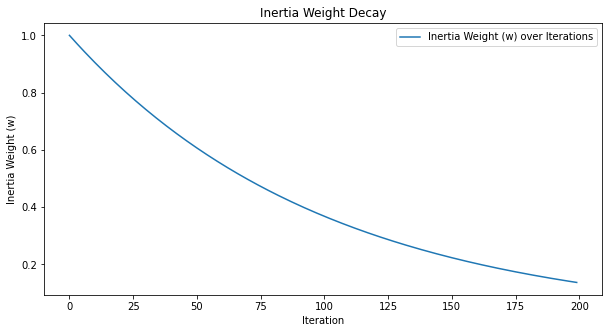

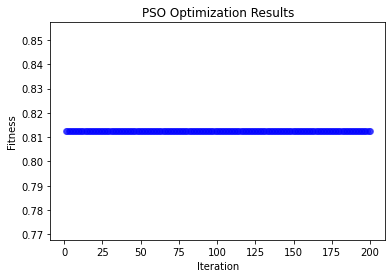

In [118]:
# Run the PSO algorithm in a loop 5 times
import random

# Define the dimensionality of the problem (number of parameters to optimize)
dimensions = 2  # In the given decision_tree_fitness function, you have 2 parameters: max_depth and min_samples_split

# Set the number of particles in the swarm
n_particles = 20
iteration_points = []
fitness_points = []
# Set the maximum number of iterations
max_iter = 200
for _ in range(1):
    # Assign random and non-uniform values to lower and upper bounds
    #lower_bounds = [random.randint(8, 18), random.randint(1, 5)]
    #upper_bounds = [random.randint(68, 78), random.randint(54, 74)]
    lower_bounds = [4,1]
    upper_bounds = [100,89]
    # Run the PSO algorithm with the decision_tree_fitness function
    best_position,w_values= psoexpo1(decision_tree_fitness, max_iter, n_particles, dimensions, lower_bounds, upper_bounds)
    
    
    # Store iteration number and corresponding fitness for plotting
    iterations = list(range(1, max_iter + 1))
    fitness_values = [decision_tree_fitness(best_position) for _ in iterations]

    iteration_points.extend(iterations)
    fitness_points.extend(fitness_values)

    # Print the result of the 100th iteration
    print("Result of the 200th iteration:", best_position)
    print('Lower Bounds:', lower_bounds)
    print('Upper Bounds:', upper_bounds)

    # Calculate and print the best fitness after the 100th iteration
    best_fitness = decision_tree_fitness(best_position)
    print("Best Fitness after the 100th iteration:", best_fitness)
    print("-" * 40)  # Separator for better visibility

    
plt.figure(figsize=(10, 5))
plt.plot(range(max_iter), w_values, label='Inertia Weight (w) over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Inertia Weight (w)')
plt.title('Inertia Weight Decay')
plt.legend()
plt.show()

# plt.figure(figsize=(10, 5))
# plt.plot(range(max_iter), c1_values, label='C1 over Iterations')
# plt.xlabel('Iteration')
# plt.ylabel('(c1)')
# plt.title('C1 Decay')
# plt.legend()
# plt.show()

# plt.figure(figsize=(10, 5))
# plt.plot(range(max_iter), c2_values, label='C2 over Iterations')
# plt.xlabel('Iteration')
# plt.ylabel('(c2)')
# plt.title('c2 decay')
# plt.legend()
# plt.show()
# Create a scatter plot
plt.scatter(iteration_points, fitness_points, marker='o', color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('PSO Optimization Results')

# Display the plot
plt.show()


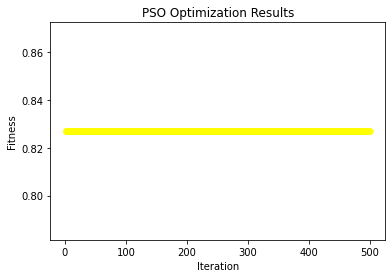

In [48]:
# Create a scatter plot
plt.scatter(iteration_points, fitness_points, marker='o', color='yellow', alpha=0.5)

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('PSO Optimization Results')

# Display the plot
plt.show()

### **7.2. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [81]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [82]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [83]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.813
Random forest: Accuracy on test Data: 0.811


In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predicted values for both training and test sets (y_train_forest, y_test_forest)

# Precision, Recall, and F1-score on training data
precision_train_forest = precision_score(y_train, y_train_forest, average='binary')  # Use average='micro' for multiclass
recall_train_forest = recall_score(y_train, y_train_forest, average='binary')
f1_train_forest = f1_score(y_train, y_train_forest, average='binary')

print("Decision Tree: Precision on training Data: {:.3f}".format(precision_train_forest))
print("Decision Tree: Recall on training Data: {:.3f}".format(recall_train_forest))
print("Decision: F1-score on training Data: {:.3f}".format(f1_train_forest))



precision_test_forest = precision_score(y_test, y_test_forest, average='binary')  # Use average='micro' for multiclass
recall_test_forest = recall_score(y_test, y_test_forest, average='binary')
f1_test_forest = f1_score(y_test, y_test_forest, average='binary')

print("Decision Tree: Precision on test Data: {:.3f}".format(precision_test_forest))
print("Decision Tree: Recall on test Data: {:.3f}".format(recall_test_forest))
print("Decision: F1-score on test Data: {:.3f}".format(f1_test_forest))


Decision Tree: Precision on training Data: 0.983
Decision Tree: Recall on training Data: 0.636
Decision: F1-score on training Data: 0.772
Decision Tree: Precision on test Data: 0.985
Decision Tree: Recall on test Data: 0.635
Decision: F1-score on test Data: 0.772


**Storing the results:**

In [85]:
from sklearn.model_selection import cross_val_score

def fitness_random_forest(params):
    
    max_depth, n_estimators = params  # You can adapt this to your specific hyperparameters
    n_estimators = int(n_estimators)
    # Create a Random Forest Classifier with the given parameters
    forest = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=0)

    # Evaluate the classifier using cross-validation
    scores = cross_val_score(forest, X_train, y_train, cv=5, scoring='accuracy')  # You can adjust the cross-validation strategy and scoring method

    # Calculate the mean accuracy from cross-validation
    mean_accuracy = scores.mean()

    # Since PSO tries to minimize the fitness function, return the negative accuracy (to maximize accuracy)
    return -mean_accuracy




In [86]:
max_iter = 100  # Adjust the number of iterations as needed
n = 10
lb = [20, 1]  # Lower bounds for n_estimators and max_depth
ub = [200, 20]
dim = 2

best_hyperparameters = pso(fitness_random_forest, max_iter, n, dim, lb, ub)


Iter = 10 best fitness = -0.861
Iter = 20 best fitness = -0.861
Iter = 30 best fitness = -0.861


KeyboardInterrupt: 

### **7.4. XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [39]:
pip install xgboost

     ---------------------------------------- 99.7/99.7 MB 1.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [21]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.867
XGBoost : Accuracy on test Data: 0.860


In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predicted values for both training and test sets (y_train_forest, y_test_forest)

# Precision, Recall, and F1-score on training data
precision_train_xgb = precision_score(y_train, y_train_xgb, average='binary')  # Use average='micro' for multiclass
recall_train_xgb = recall_score(y_train, y_train_xgb, average='binary')
f1_train_xgb = f1_score(y_train, y_train_xgb, average='binary')

print("Decision Tree: Precision on training Data: {:.3f}".format(precision_train_forest))
print("Decision Tree: Recall on training Data: {:.3f}".format(recall_train_forest))
print("Decision: F1-score on training Data: {:.3f}".format(f1_train_forest))



precision_test_xgb = precision_score(y_test, y_test_xgb, average='binary')  # Use average='micro' for multiclass
recall_test_xgb = recall_score(y_test, y_test_xgb, average='binary')
f1_test_xgb = f1_score(y_test, y_test_xgb, average='binary')

print("Decision Tree: Precision on test Data: {:.3f}".format(precision_test_forest))
print("Decision Tree: Recall on test Data: {:.3f}".format(recall_test_forest))
print("Decision: F1-score on test Data: {:.3f}".format(f1_test_forest))


NameError: name 'precision_train_forest' is not defined

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

def xgboost_fitness(position):
    # Convert position t integer values for parameters
    max_depth = int(position[0])
    #learning_rate = position[1]
    n_estimators = int(position[1])

    # Create an XGBoost Classifier with the given parameters
    xgb_classifier = XGBClassifier(
        max_depth=max_depth,
        #learning_rate=learning_rate,
        n_estimators=n_estimators,
        random_state=42
    )

    # Train the classifier on the training data
    xgb_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = xgb_classifier.predict(X_test)

    # Calculate the accuracy score as the fitness value
    fitness_value = accuracy_score(y_test, y_pred)

    return fitness_value

# Example usage of the PSO algorithm with the xgboost_fitness function


**XG BOOST CLASSIFIER USING PSO**

In [38]:
# Run the PSO algorithm in a loop 5 times
import random

# Define the dimensionality of the problem (number of parameters to optimize)
dimensions = 2 # In the given decision_tree_fitness function, you have 2 parameters: max_depth and min_samples_split

# Set the number of particles in the swarm
n_particles = 20
iteration_points = []
fitness_points = []
# Set the maximum number of iterations
max_iter = 100
for _ in range(1):
    # Assign random and non-uniform values to lower and upper bounds
    #lower_bounds = [random.randint(8, 18), random.randint(1, 5)]
    #upper_bounds = [random.randint(68, 78), random.randint(54, 74)]
    lower_bounds = [1,1]  # Minimum values for max_depth, learning_rate, and n_estimators
    upper_bounds = [300,300]
    # Run the PSO algorithm with the decision_tree_fitness function
    best_position = pso(xgboost_fitness, max_iter, n_particles, dimensions, lower_bounds, upper_bounds)
    
    
    # Store iteration number and corresponding fitness for plotting
    iterations = list(range(1, max_iter + 1))
    fitness_values = [xgboost_fitness(best_position) for _ in iterations]

    iteration_points.extend(iterations)
    fitness_points.extend(fitness_values)

    # Print the result of the 100th iteration
    print("Result of the 100th iteration:", best_position)
    print('Lower Bounds:', lower_bounds)
    print('Upper Bounds:', upper_bounds)

    # Calculate and print the best fitness after the 100th iteration
    best_fitness = xgboost_fitness(best_position)
    print("Best Fitness after the 100th iteration:", best_fitness)
    print("-" * 40)  # Separator for better visibility

# Create a scatter plot
plt.scatter(iteration_points, fitness_points, marker='o', color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('PSO Optimization Results')

# Display the plot
plt.show()


Iter = 10 best fitness = 0.862
Iter = 20 best fitness = 0.862
Iter = 30 best fitness = 0.862


KeyboardInterrupt: 

**Define Fitness Function**